In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [2]:
mangaid = '1-22948'
nsa_z = 0.119399
plateifu = '7992-9102'

In [3]:
data = fits.open('/Users/natachaupra/Downloads/manga-7992-9102-LOGCUBE.fits.gz')

flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))

do_not_use = (mask & 2**10) != 0 

wave = data['WAVE'].data

flux_header = data['FLUX'].header

In [4]:
n = len(flux)
sumflux = np.zeros(4563)
    
for i in range(n):
    for j in range(n):
        flux[i,j] = flux[i,j] * ~do_not_use[i,j]
        sumflux = np.add(sumflux, flux[i,j])

In [5]:
a = 5007 * (1 + nsa_z)

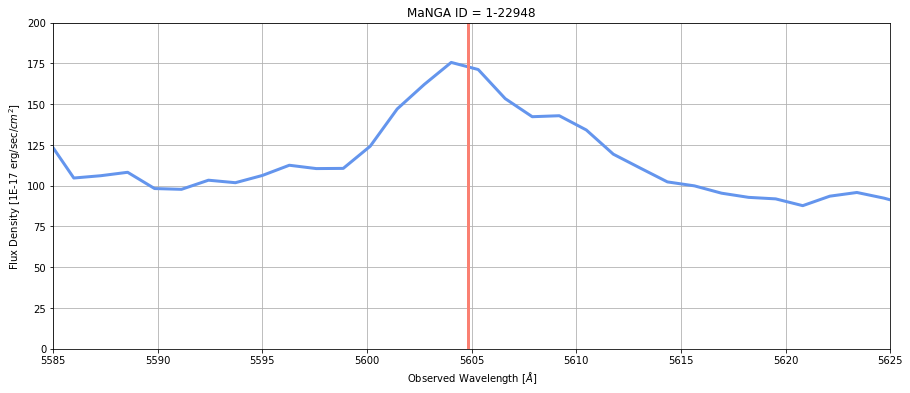

In [6]:
start = 5585
end = 5625
height = 200
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, linewidth = 3, color = 'cornflowerblue')
plt.axvline(a, linewidth = 3, color = 'salmon')
# plt.savefig('Images/Check_z_{}'.format(mangaid), bbox_inches = 'tight')

## Lower Bound -- Lower MBH

In [7]:
# select peak region
index = 0
yaxis = np.where(np.logical_and(wave > start, wave < end))[0]
# print(yaxis)
    
# yaxis = yaxis[4:25]
yaxis_lower = yaxis[10:22]
print(yaxis_lower)
print(len(yaxis_lower))

# for i in yaxis:
#     print(wave[i])

[1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903]
12


In [8]:
flux_compare = [] 
ivar_compare = []

for i in yaxis_lower:
    flux_compare.append(flux[:,:,i].flatten())
    ivar_compare.append(ivar[:,:,i].flatten())

flux_compare = np.array(flux_compare)
ivar_compare = np.array(ivar_compare)

len(flux_compare[0]), len(ivar_compare)

(4096, 12)

In [9]:
result = []
sumresult = []

for i in range(len(yaxis_lower)):
    for j in range(len(flux)**2):
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
        
        if flux_compare[i][j] < (3 * sigma):
            result.append(0)
        else:
            result.append(flux_compare[i][j])
    sumresult.append(np.sum(result))
    result = []

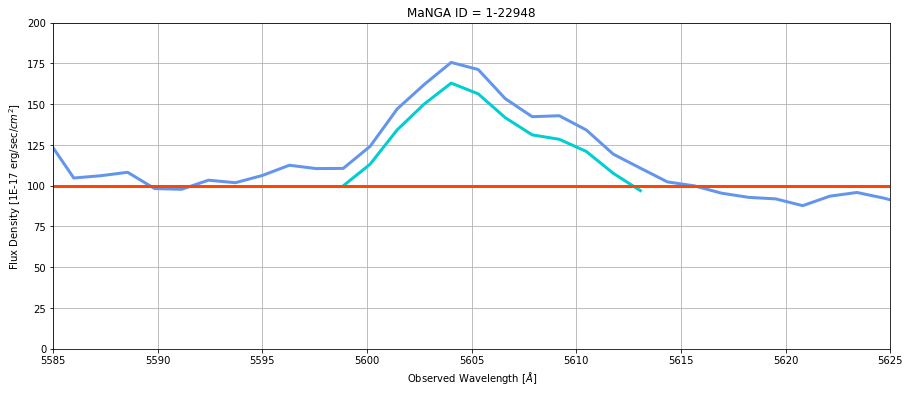

In [10]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0, height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')
# plt.savefig('Images/3sigma_subtracted_{}'.format(mangaid), bbox_inches = 'tight')

In [11]:
line1 = 5611
line2 = 5614
height1 = 90
height2 = 110

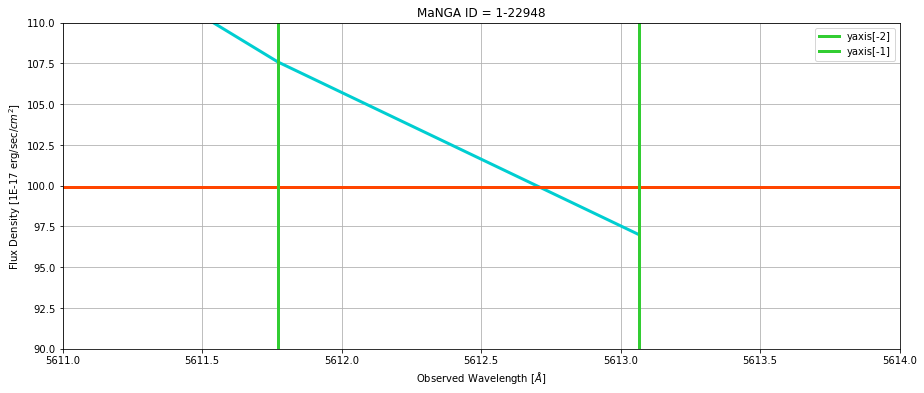

In [12]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis_lower[-2]], color = 'limegreen', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis_lower[-1]], color = 'limegreen', linewidth = 3, label = 'yaxis[-1]')

plt.legend()
#1954 1955
# plt.savefig('Images/Cutting_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [13]:
index2 = np.where(yaxis_lower == yaxis_lower[-2])[0][0]
print(index2)
sumresult[index2]

10


107.58775651082397

In [14]:
# Get x and y of the both coordinates that define the line above 
x = [wave[yaxis_lower[-2]], wave[yaxis_lower[-1]]]
y = [sumresult[index2], sumresult[index2 + 1]]
print(x)
print(y)
print(sumresult[index2])

[5611.771769773147, 5613.064076752015]
[107.58775651082397, 97.01356457918882]
107.58775651082397


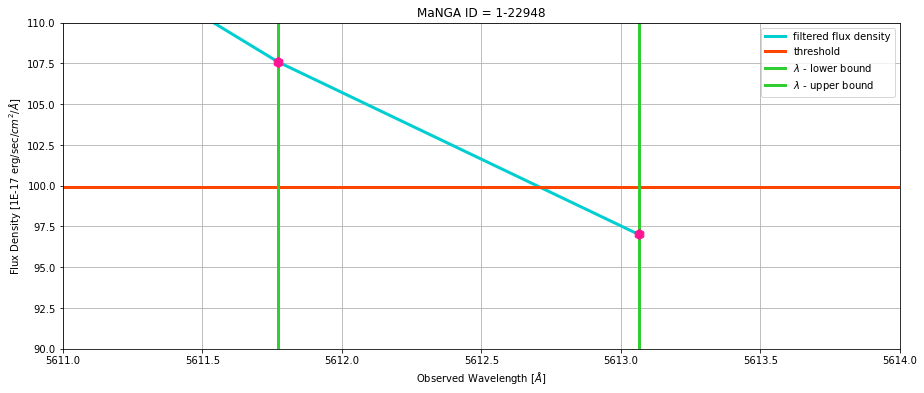

In [15]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
# plt.axhline(sumresult[index2], linewidth = 3, color = 'green', label = 'sumresult[index2]')

plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_lower[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_lower[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')

plt.plot(x[0], y[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x[1], y[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Verifying_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [16]:
# Get the gradient of the line above 
m = (y[1] - y[0])/(x[1] - x[0])
m

-8.182414940522463

In [17]:
# Get the y intercept of the line above 
c = y[0] - m*x[0]
c

46025.43292830481

In [18]:
# Define the function y = mx + c 
def func(y, m, c):
    print(y, m, c)
    x = (y - c)/m
    return x

In [19]:
xval = func(sumresult[index], m, c)
xval

99.92414371855557 -8.182414940522463 46025.43292830481


5612.708365246241

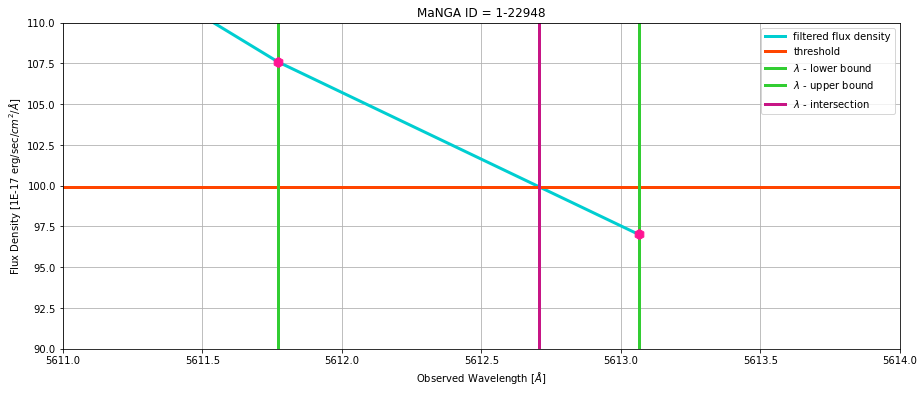

In [20]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_lower[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_lower[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')
plt.axvline(xval, color = 'mediumvioletred', linewidth = 3, label = r'$\lambda$ - intersection')
plt.plot(x[0], y[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x[1], y[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Intersection_{}'.format(mangaid), bbox_inches = 'tight')

In [21]:
xcoord = []
ycoord = []

for i in range(yaxis_lower[0], yaxis_lower[-1]):
    xcoord.append(wave[i])
    
xcoord.append(xval)
ycoord = sumresult[:-1]
ycoord.append(sumresult[index])
len(xcoord), len(sumresult), len(ycoord)

# print(xcoord[-1])
# print(sumresult[-1])
# print(sumresult[index])
# print(ycoord)

(12, 12, 12)

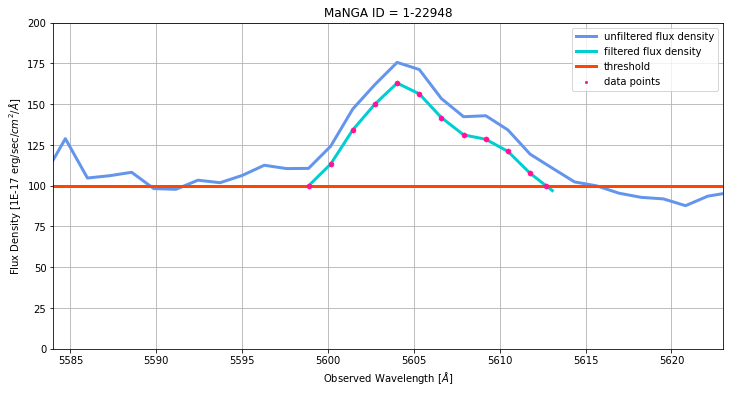

In [22]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlim(start-1, end-2)
# plt.xlim(5500, 5700)
plt.ylim(0,height)
# plt.ylim(0,700)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3, label = 'unfiltered flux density')
plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3
        , label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

for i in range(len(xcoord)):
    plt.plot(xcoord[i], ycoord[i], color = 'deeppink', marker = 'h', ms = 5)

plt.scatter(0,0, color = 'deeppink', marker = 'h', s = 5, label = 'data points')
plt.legend()
# plt.plot(xcoord[-1], sumresult[index], marker = 'h', ms = 15, color = 'green')
# plt.savefig('Images/Verifying_Coordinates_{}'.format(mangaid), bbox_inches = 'tight')

In [23]:
dlmd = []
for i in range(len(xcoord)-1):
    dlmd.append(xcoord[i+1] - xcoord[i])

In [24]:
# Trapezium rule
# area = y_1 * h_1 + y_last * h_last + the in betweens 
area = ycoord[0] * dlmd[0] + ycoord[-1] * dlmd[-1]
# print(ycoord[0] * dlmd[0])
# print(ycoord[-1] * dlmd[-1])

for i in range(1, len(ycoord)-1):
#     print(i)
    area += ycoord[i] * (dlmd[i-1] + dlmd[i])

finalarea = (1/2) * area
finalarea

1830.5914411025055

In [25]:
subtract = ycoord[0] * (xcoord[-1] - xcoord[0])
subtract

1383.2811363962962

In [26]:
fluxarea = finalarea - subtract
fluxarea

447.3103047062093

In [27]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

def luminosity_calc(luminosity_distance, fluxarea):
    return 4 * np.pi * (luminosity_distance**2) * fluxarea * (1e-17)

def BH_calc(luminosity):
    return (3200 * luminosity) / (sol_luminosity * lmd_edd * 3.28 * (10**4))

nsa_z

0.119399

In [28]:
sol_mass = 2 * (10**30)
lmd_edd = 1
sol_luminosity = 3.846 * 10**33

## Upper Bound -- Higher MBH

In [29]:
start_upper = 5585
end_upper = 5625

In [30]:
# select peak region
# index = 0
yaxis = np.where(np.logical_and(wave > start_upper, wave < end_upper))[0]
# print(yaxis)
    
# yaxis = yaxis[4:25]
# yaxis_lower = yaxis[10:22]
yaxis_upper = yaxis[4:25]
print(yaxis_upper)
print(len(yaxis_upper))

# for i in yaxis:
#     print(wave[i])

[1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899
 1900 1901 1902 1903 1904 1905 1906]
21


In [31]:
flux_compare_upper = [] 
ivar_compare_upper = []

for i in yaxis_upper:
    flux_compare_upper.append(flux[:,:,i].flatten())
    ivar_compare_upper.append(ivar[:,:,i].flatten())

flux_compare_upper = np.array(flux_compare_upper)
ivar_compare_upper = np.array(ivar_compare_upper)

len(flux_compare_upper[0]), len(ivar_compare_upper)

(4096, 21)

In [32]:
result_upper = []
sumresult_upper = []

for i in range(len(yaxis_upper)):
    for j in range(len(flux)**2):
        sigma = np.sqrt(1 / ivar_compare_upper[i][j]) if ivar_compare_upper[i][j] != 0 else 0
        
        if flux_compare_upper[i][j] < (3 * sigma):
            result_upper.append(0)
        else:
            result_upper.append(flux_compare_upper[i][j])
    sumresult_upper.append(np.sum(result_upper))
    result_upper = []

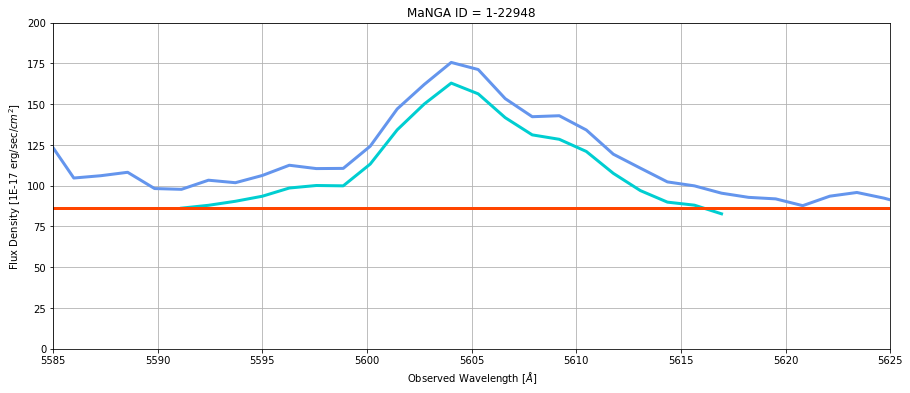

In [33]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start_upper, end_upper)
# plt.xlim(5590, 5595)
plt.ylim(0, height)
# plt.ylim(75, 125)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult_upper[index], linewidth = 3, color = 'orangered')
# plt.savefig('Images/3sigma_subtracted_{}'.format(mangaid), bbox_inches = 'tight')

In [34]:
line1_upper = 5615
line2_upper = 5618
height1_upper = 80
height2_upper = 90

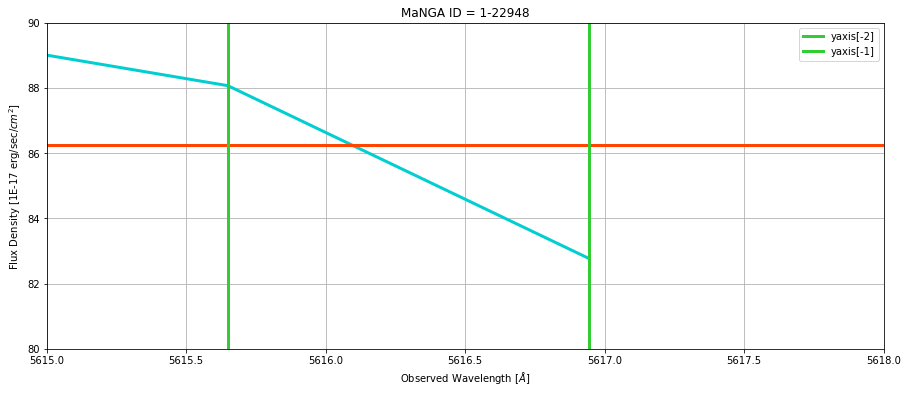

In [35]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1_upper, line2_upper)
plt.ylim(height1_upper, height2_upper)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult_upper[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis_upper[-2]], color = 'limegreen', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis_upper[-1]], color = 'limegreen', linewidth = 3, label = 'yaxis[-1]')

plt.legend()
#1954 1955
# plt.savefig('Images/Cutting_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [36]:
index2_upper = np.where(yaxis_upper == yaxis_upper[-2])[0][0]
print(index2_upper)
sumresult_upper[index2_upper]

19


88.06757699884474

In [37]:
# Get x and y of the both coordinates that define the line above 
x_upper = [wave[yaxis_upper[-2]], wave[yaxis_upper[-1]]]
y_upper = [sumresult_upper[index2_upper], sumresult_upper[index2_upper + 1]]
print(x_upper)
print(y_upper)
print(sumresult_upper[index2_upper])

[5615.649583575098, 5616.942783556393]
[88.06757699884474, 82.77353848330677]
88.06757699884474


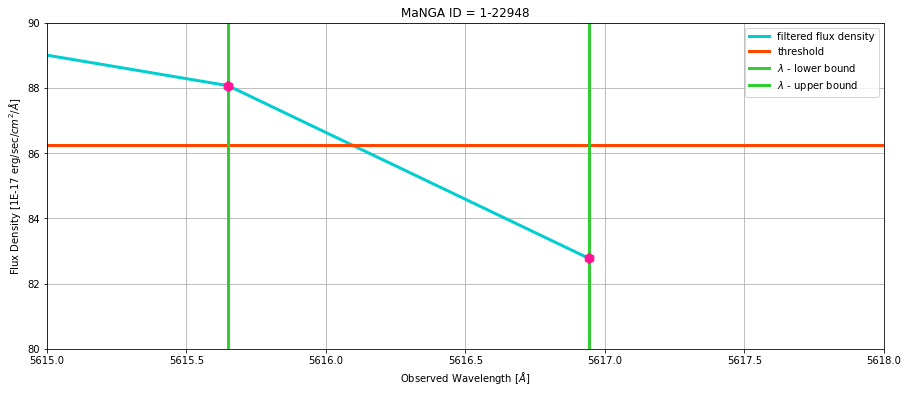

In [38]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1_upper, line2_upper)
plt.ylim(height1_upper, height2_upper)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
# plt.axhline(sumresult[index2], linewidth = 3, color = 'green', label = 'sumresult[index2]')

plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult_upper[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_upper[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_upper[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')

plt.plot(x_upper[0], y_upper[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x_upper[1], y_upper[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Verifying_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [39]:
# Get the gradient of the line above 
m_upper = (y_upper[1] - y_upper[0])/(x_upper[1] - x_upper[0])
m_upper

-4.093750844504845

In [40]:
# Get the y intercept of the line above 
c_upper = y_upper[0] - m_upper*x_upper[0]
c_upper

23077.137802202684

In [41]:
xval_upper = func(sumresult_upper[index], m_upper, c_upper)
xval_upper

86.25794780999422 -4.093750844504845 23077.137802202684


5616.091630308665

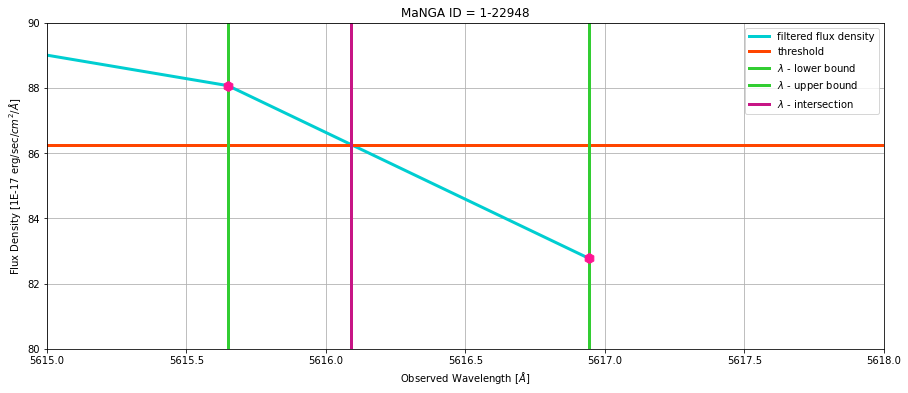

In [42]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1_upper, line2_upper)
plt.ylim(height1_upper, height2_upper)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult_upper[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_upper[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_upper[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')
plt.axvline(xval_upper, color = 'mediumvioletred', linewidth = 3, label = r'$\lambda$ - intersection')
plt.plot(x_upper[0], y_upper[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x_upper[1], y_upper[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Intersection_{}'.format(mangaid), bbox_inches = 'tight')

In [43]:
xcoord_upper = []
ycoord_upper = []

for i in range(yaxis_upper[0], yaxis_upper[-1]):
    xcoord_upper.append(wave[i])
    
xcoord_upper.append(xval_upper)
ycoord_upper = sumresult_upper[:-1]
ycoord_upper.append(sumresult_upper[index])
len(xcoord_upper), len(sumresult_upper), len(ycoord_upper)

# print(xcoord[-1])
# print(sumresult[-1])
# print(sumresult[index])
# print(ycoord)

(21, 21, 21)

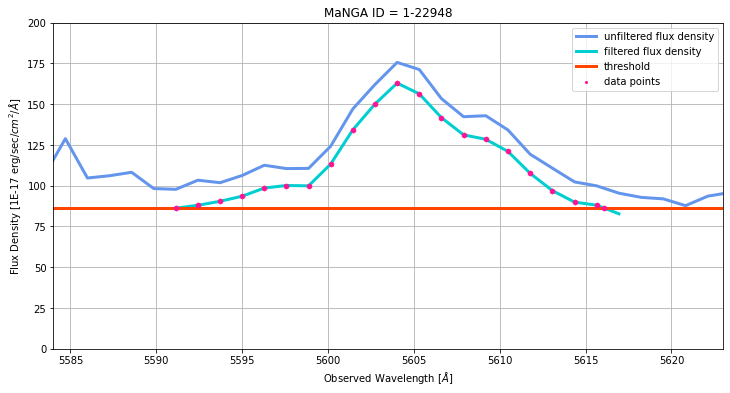

In [44]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlim(start_upper-1, end_upper-2)
# plt.xlim(5500, 5700)
plt.ylim(0,height)
# plt.ylim(0,700)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3, label = 'unfiltered flux density')
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3
        , label = 'filtered flux density')
plt.axhline(sumresult_upper[index], linewidth = 3, color = 'orangered', label = 'threshold')

for i in range(len(xcoord_upper)):
    plt.plot(xcoord_upper[i], ycoord_upper[i], color = 'deeppink', marker = 'h', ms = 5)

plt.scatter(0,0, color = 'deeppink', marker = 'h', s = 5, label = 'data points')
plt.legend()
# plt.plot(xcoord[-1], sumresult[index], marker = 'h', ms = 15, color = 'green')
# plt.savefig('Images/Verifying_Coordinates_{}'.format(mangaid), bbox_inches = 'tight')

In [45]:
dlmd_upper = []
for i in range(len(xcoord_upper)-1):
    dlmd_upper.append(xcoord_upper[i+1] - xcoord_upper[i])

In [46]:
# Trapezium rule
# area = y_1 * h_1 + y_last * h_last + the in betweens 
area_upper = ycoord_upper[0] * dlmd_upper[0] + ycoord_upper[-1] * dlmd_upper[-1]
# print(ycoord[0] * dlmd[0])
# print(ycoord[-1] * dlmd[-1])

for i in range(1, len(ycoord_upper)-1):
#     print(i)
    area_upper += ycoord_upper[i] * (dlmd_upper[i-1] + dlmd_upper[i])

finalarea_upper = (1/2) * area_upper
finalarea_upper

2866.4334632409873

In [47]:
subtract_upper = ycoord_upper[0] * (xcoord_upper[-1] - xcoord_upper[0])
subtract_upper

2152.6839328787273

In [48]:
fluxarea_upper = finalarea_upper - subtract_upper
fluxarea_upper

713.74953036226

In [49]:
# Upper
luminosity_distance = Mpc_to_cm(556.7)
luminosity_upper = luminosity_calc(luminosity_distance, fluxarea_upper)
print(luminosity_distance, 'cm', '/', luminosity_upper, ('erg/s (?)'))

1.717798056e+27 cm / 2.6466707232804426e+41 erg/s (?)


In [50]:
# Lower
luminosity_distance = Mpc_to_cm(556.7)
luminosity = luminosity_calc(luminosity_distance, fluxarea)
print(luminosity_distance, 'cm', '/', luminosity, ('erg/s (?)'))

1.717798056e+27 cm / 1.6586814244020647e+41 erg/s (?)


## Results

In [56]:
print(mangaid)
print(nsa_z)

print()

print('Luminosity Distance before conversion = ', 556.7)
print('Luminosity Distance = ', luminosity_distance, 'cm')

print()

print('flux = ', 557.2728773803908)
print('Luminosity = ', 2.0664361189734796e+41, 'erg/s (?)')
print('M_BH / M_sol = 5241901.294911354')
print('log(luminosity) = 41.31522198420949')
print('log(M_BH / M_sol) = 6.71948883891525')
print('log(luminosity / sol_lum) = 7.730212704307023')

print()

print('Upper Bound')
print('flux = ', fluxarea_upper)
print('Luminosity = ', luminosity_upper, 'erg/s (?)')
print('M_BH / M_sol =',BH_calc(luminosity_upper))
print('log(luminosity) =',np.log10(luminosity_upper))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity_upper)))
print('log(luminosity / sol_lum) =', np.log10(luminosity_upper / sol_luminosity))

print()

print('Lower Bound')
print('flux = ', fluxarea)
print('Luminosity = ', luminosity, 'erg/s (?)')
print('M_BH / M_sol =',BH_calc(luminosity))
print('log(luminosity) =',np.log10(luminosity))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity)))
print('log(luminosity / sol_lum) =', np.log10(luminosity / sol_luminosity))

1-22948
0.119399

Luminosity Distance before conversion =  556.7
Luminosity Distance =  1.717798056e+27 cm

flux =  557.2728773803908
Luminosity =  2.0664361189734796e+41 erg/s (?)
M_BH / M_sol = 5241901.294911354
log(luminosity) = 41.31522198420949
log(M_BH / M_sol) = 6.71948883891525
log(luminosity / sol_lum) = 7.730212704307023

Upper Bound
flux =  713.74953036226
Luminosity =  2.6466707232804426e+41 erg/s (?)
M_BH / M_sol = 6713774.775897525
log(luminosity) = 41.4226999133612
log(M_BH / M_sol) = 6.8269667680669635
log(luminosity / sol_lum) = 7.837690633458736

Lower Bound
flux =  447.3103047062093
Luminosity =  1.6586814244020647e+41 erg/s (?)
M_BH / M_sol = 4207555.329964777
log(luminosity) = 41.21976298101527
log(M_BH / M_sol) = 6.624029835721038
log(luminosity / sol_lum) = 7.634753701112811


### Upper Bound

In [52]:
print('flux = ', fluxarea_upper)
print('Luminosity = ', luminosity_upper, 'erg/s (?)')
print('M_BH / M_sol =',BH_calc(luminosity_upper))
print('log(luminosity) =',np.log10(luminosity_upper))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity_upper)))
print('log(luminosity / sol_lum) =', np.log10(luminosity_upper / sol_luminosity))

flux =  713.74953036226
Luminosity =  2.6466707232804426e+41 erg/s (?)
M_BH / M_sol = 6713774.775897525
log(luminosity) = 41.4226999133612
log(M_BH / M_sol) = 6.8269667680669635
log(luminosity / sol_lum) = 7.837690633458736


### Lower Bound

In [53]:
print('flux = ', fluxarea)
print('Luminosity = ', luminosity, 'erg/s (?)')
print('M_BH / M_sol =',BH_calc(luminosity))
print('log(luminosity) =',np.log10(luminosity))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity)))
print('log(luminosity / sol_lum) =', np.log10(luminosity / sol_luminosity))

flux =  447.3103047062093
Luminosity =  1.6586814244020647e+41 erg/s (?)
M_BH / M_sol = 4207555.329964777
log(luminosity) = 41.21976298101527
log(M_BH / M_sol) = 6.624029835721038
log(luminosity / sol_lum) = 7.634753701112811


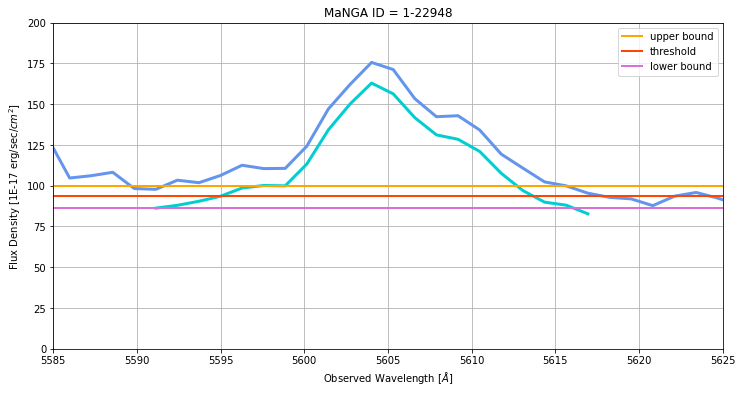

In [54]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlim(start, end)
# plt.xlim(5500,5700)
plt.ylim(0, height)
# plt.ylim(200,300)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 2, color = 'orange', label = 'upper bound')

plt.axhline(93.56181238032877, linewidth = 2, color = 'orangered', label = 'threshold')

plt.axhline(sumresult_upper[index], linewidth = 2, color = 'orchid', label = 'lower bound')


plt.legend()

# plt.savefig('Images/ub_th_lb.png', bbox_inches = 'tight')